## Sentiment Analysis on posts

In [2]:
! pip install textblob

     -------------------------------------- 626.3/626.3 kB 7.9 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 12.0 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


### use the reddit_stock_posts.csv , the scrapped data file

In [2]:
import pandas as pd
from textblob import TextBlob  
reddit_posts = pd.read_csv("reddit_stock_posts.csv")  
reddit_posts.head()


,Datetime,Content,Stock
0,2024-11-29 10:30:09,r/Stocks Daily Discussion & Fundamentals Frida...,AAPL
1,2024-11-22 10:30:12,r/Stocks Daily Discussion & Fundamentals Frida...,AAPL
2,2024-11-15 10:30:09,r/Stocks Daily Discussion & Fundamentals Frida...,AAPL
3,2024-11-08 10:30:10,r/Stocks Daily Discussion & Fundamentals Frida...,AAPL
4,2024-11-02 18:20:38,Globalstar and Apple expanded partnership - D...,AAPL


In [3]:
reddit_posts.columns

Index(['Datetime', 'Content', 'Stock'], dtype='object')

In [4]:
import datetime
reddit_posts['Datetime'] = pd.to_datetime(reddit_posts['Datetime'])

In [5]:
reddit_posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1856 entries, 0 to 1855
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  1856 non-null   datetime64[ns]
 1   Content   1856 non-null   object        
 2   Stock     1856 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 43.6+ KB


##  Calculating sentiment scores using TextBlob library

In [6]:
def analyze_sentiment(content):
    analysis = TextBlob(content)
    return analysis.sentiment.polarity 

reddit_posts['sentiment_score'] = reddit_posts['Content'].apply(analyze_sentiment)
print(reddit_posts.head())

             Datetime                                            Content  \
0 2024-11-29 10:30:09  r/Stocks Daily Discussion & Fundamentals Frida...   
1 2024-11-22 10:30:12  r/Stocks Daily Discussion & Fundamentals Frida...   
2 2024-11-15 10:30:09  r/Stocks Daily Discussion & Fundamentals Frida...   
3 2024-11-08 10:30:10  r/Stocks Daily Discussion & Fundamentals Frida...   
4 2024-11-02 18:20:38  Globalstar and Apple expanded partnership  - D...   

  Stock  sentiment_score  
0  AAPL         0.104167  
1  AAPL         0.104167  
2  AAPL         0.104167  
3  AAPL         0.104167  
4  AAPL         0.000000  


In [7]:
reddit_posts.sentiment_score

0       0.104167
1       0.104167
2       0.104167
3       0.104167
4       0.000000
          ...   
1851    0.000000
1852    0.250000
1853    0.125000
1854    0.000000
1855    0.078571
Name: sentiment_score, Length: 1856, dtype: float64

In [8]:
reddit_posts.to_csv("reddit_posts_with_sentiment.csv", index=False)

In [9]:
df1=pd.read_csv("reddit_posts_with_sentiment.csv")

In [10]:
df2=pd.read_csv("Stocks_Data.csv")

In [11]:
print("df1:",df1.shape)
print("df1:",df2.shape)

df1: (1856, 4)
df1: (2515, 10)


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1856 entries, 0 to 1855
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Datetime         1856 non-null   object 
 1   Content          1856 non-null   object 
 2   Stock            1856 non-null   object 
 3   sentiment_score  1856 non-null   float64
dtypes: float64(1), object(3)
memory usage: 58.1+ KB


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2515 non-null   int64  
 1   Date          2515 non-null   object 
 2   Open          2515 non-null   float64
 3   High          2515 non-null   float64
 4   Low           2515 non-null   float64
 5   Close         2515 non-null   float64
 6   Volume        2515 non-null   int64  
 7   Dividends     2515 non-null   float64
 8   Stock Splits  2515 non-null   float64
 9   Stock         2515 non-null   object 
dtypes: float64(6), int64(2), object(2)
memory usage: 196.6+ KB


In [14]:
df1.Stock

0        AAPL
1        AAPL
2        AAPL
3        AAPL
4        AAPL
        ...  
1851    GOOGL
1852    GOOGL
1853    GOOGL
1854    GOOGL
1855    GOOGL
Name: Stock, Length: 1856, dtype: object

In [15]:
df2.Stock

0        AAPL
1        AAPL
2        AAPL
3        AAPL
4        AAPL
        ...  
2510    GOOGL
2511    GOOGL
2512    GOOGL
2513    GOOGL
2514    GOOGL
Name: Stock, Length: 2515, dtype: object

In [16]:
df1.Datetime

0       2024-11-29 10:30:09
1       2024-11-22 10:30:12
2       2024-11-15 10:30:09
3       2024-11-08 10:30:10
4       2024-11-02 18:20:38
               ...         
1851    2023-12-22 10:05:56
1852    2023-12-19 16:50:30
1853    2023-12-16 19:21:07
1854    2023-12-13 01:15:50
1855    2023-12-11 19:30:32
Name: Datetime, Length: 1856, dtype: object

In [17]:
df2.Date

0       2022-11-30 00:00:00-05:00
1       2022-12-01 00:00:00-05:00
2       2022-12-02 00:00:00-05:00
3       2022-12-05 00:00:00-05:00
4       2022-12-06 00:00:00-05:00
                  ...            
2510    2024-11-22 00:00:00-05:00
2511    2024-11-25 00:00:00-05:00
2512    2024-11-26 00:00:00-05:00
2513    2024-11-27 00:00:00-05:00
2514    2024-11-29 00:00:00-05:00
Name: Date, Length: 2515, dtype: object

In [18]:
df1.head()

,Datetime,Content,Stock,sentiment_score
0,2024-11-29 10:30:09,r/Stocks Daily Discussion & Fundamentals Frida...,AAPL,0.104167
1,2024-11-22 10:30:12,r/Stocks Daily Discussion & Fundamentals Frida...,AAPL,0.104167
2,2024-11-15 10:30:09,r/Stocks Daily Discussion & Fundamentals Frida...,AAPL,0.104167
3,2024-11-08 10:30:10,r/Stocks Daily Discussion & Fundamentals Frida...,AAPL,0.104167
4,2024-11-02 18:20:38,Globalstar and Apple expanded partnership - D...,AAPL,0.000000


In [19]:
df2.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Stock
0,0,2022-11-30 00:00:00-05:00,139.928537,147.172370,139.087391,146.489548,111380900,0.0,0.0,AAPL
1,1,2022-12-01 00:00:00-05:00,146.667651,147.578075,145.084296,146.766602,71250400,0.0,0.0,AAPL
2,2,2022-12-02 00:00:00-05:00,144.441081,146.459845,144.134294,146.271820,65447400,0.0,0.0,AAPL
3,3,2022-12-05 00:00:00-05:00,146.232231,149.349445,144.253044,145.104095,68826400,0.0,0.0,AAPL
4,4,2022-12-06 00:00:00-05:00,145.539503,145.767105,140.443088,141.422791,64727200,0.0,0.0,AAPL


In [20]:
df1['Datetime'] = pd.to_datetime(df1['Datetime'])  


In [21]:
df1['Date'] = df1['Datetime'].dt.date  

In [22]:
df2['Date'] = pd.to_datetime(df2['Date'])

In [23]:
print(df2['Date'].dtype)

object


In [24]:
df2['Date'] = pd.to_datetime(df2['Date'], utc=True).dt.date

In [25]:
df2.Date

0       2022-11-30
1       2022-12-01
2       2022-12-02
3       2022-12-05
4       2022-12-06
           ...    
2510    2024-11-22
2511    2024-11-25
2512    2024-11-26
2513    2024-11-27
2514    2024-11-29
Name: Date, Length: 2515, dtype: object

In [26]:
df1.Date

0       2024-11-29
1       2024-11-22
2       2024-11-15
3       2024-11-08
4       2024-11-02
           ...    
1851    2023-12-22
1852    2023-12-19
1853    2023-12-16
1854    2023-12-13
1855    2023-12-11
Name: Date, Length: 1856, dtype: object

In [27]:
df1.columns

Index(['Datetime', 'Content', 'Stock', 'sentiment_score', 'Date'], dtype='object')

In [28]:
df2.columns

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Dividends', 'Stock Splits', 'Stock'],
      dtype='object')

In [29]:
df1.drop('Datetime',axis=1,inplace=True)

In [30]:
df1.columns

Index(['Content', 'Stock', 'sentiment_score', 'Date'], dtype='object')

In [31]:
df1.head()

,Content,Stock,sentiment_score,Date
0,r/Stocks Daily Discussion & Fundamentals Frida...,AAPL,0.104167,2024-11-29
1,r/Stocks Daily Discussion & Fundamentals Frida...,AAPL,0.104167,2024-11-22
2,r/Stocks Daily Discussion & Fundamentals Frida...,AAPL,0.104167,2024-11-15
3,r/Stocks Daily Discussion & Fundamentals Frida...,AAPL,0.104167,2024-11-08
4,Globalstar and Apple expanded partnership - D...,AAPL,0.000000,2024-11-02


In [32]:
df2.drop('Unnamed: 0',axis=1,inplace=True)

In [33]:
df2.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Stock
0,2022-11-30,139.928537,147.172370,139.087391,146.489548,111380900,0.0,0.0,AAPL
1,2022-12-01,146.667651,147.578075,145.084296,146.766602,71250400,0.0,0.0,AAPL
2,2022-12-02,144.441081,146.459845,144.134294,146.271820,65447400,0.0,0.0,AAPL
3,2022-12-05,146.232231,149.349445,144.253044,145.104095,68826400,0.0,0.0,AAPL
4,2022-12-06,145.539503,145.767105,140.443088,141.422791,64727200,0.0,0.0,AAPL


In [34]:
df11=df1
df22=df2

In [35]:
df1=df11
df2=df22

### Merging the two dataframes on Stock and date column

In [36]:

merged_df = pd.merge(df1, df2, on=['Stock', 'Date'], how='left')


In [37]:
merged_df.isnull().sum()

Content              0
Stock                0
sentiment_score      0
Date                 0
Open               402
High               402
Low                402
Close              402
Volume             402
Dividends          402
Stock Splits       402
dtype: int64

In [38]:
merged_df.head()

,Content,Stock,sentiment_score,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,r/Stocks Daily Discussion & Fundamentals Frida...,AAPL,0.104167,2024-11-29,234.809998,237.809998,233.970001,237.330002,28481400.0,0.00,0.0
1,r/Stocks Daily Discussion & Fundamentals Frida...,AAPL,0.104167,2024-11-22,228.059998,230.720001,228.059998,229.869995,38168300.0,0.00,0.0
2,r/Stocks Daily Discussion & Fundamentals Frida...,AAPL,0.104167,2024-11-15,226.399994,226.919998,224.270004,225.000000,47923700.0,0.00,0.0
3,r/Stocks Daily Discussion & Fundamentals Frida...,AAPL,0.104167,2024-11-08,227.169998,228.660004,226.410004,226.960007,38328800.0,0.25,0.0
4,Globalstar and Apple expanded partnership - D...,AAPL,0.000000,2024-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
merged_df1=merged_df

## Calculating the daily average sentiment score for each stock

In [40]:
# Compute the average daily sentiment score for each stock
average_sentiment = merged_df.groupby(['Stock', 'Date'])['sentiment_score'].mean().reset_index()

merged_df = pd.merge(merged_df, average_sentiment, on=['Stock', 'Date'], suffixes=('', '_average'))
print(merged_df.head())


                                             Content Stock  sentiment_score  \
0  r/Stocks Daily Discussion & Fundamentals Frida...  AAPL         0.104167   
1  Old IRA very overweight in two equities - opin...  AAPL         0.141667   
2  r/Stocks Daily Discussion & Fundamentals Frida...  AAPL         0.104167   
3  r/Stocks Daily Discussion & Fundamentals Frida...  AAPL         0.104167   
4  r/Stocks Daily Discussion & Fundamentals Frida...  AAPL         0.104167   

         Date        Open        High         Low       Close      Volume  \
0  2024-11-29  234.809998  237.809998  233.970001  237.330002  28481400.0   
1  2024-11-29  234.809998  237.809998  233.970001  237.330002  28481400.0   
2  2024-11-22  228.059998  230.720001  228.059998  229.869995  38168300.0   
3  2024-11-15  226.399994  226.919998  224.270004  225.000000  47923700.0   
4  2024-11-08  227.169998  228.660004  226.410004  226.960007  38328800.0   

   Dividends  Stock Splits  sentiment_score_average  
0       

In [41]:
merged_df.head()

,Content,Stock,sentiment_score,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,sentiment_score_average
0,r/Stocks Daily Discussion & Fundamentals Frida...,AAPL,0.104167,2024-11-29,234.809998,237.809998,233.970001,237.330002,28481400.0,0.00,0.0,0.122917
1,Old IRA very overweight in two equities - opin...,AAPL,0.141667,2024-11-29,234.809998,237.809998,233.970001,237.330002,28481400.0,0.00,0.0,0.122917
2,r/Stocks Daily Discussion & Fundamentals Frida...,AAPL,0.104167,2024-11-22,228.059998,230.720001,228.059998,229.869995,38168300.0,0.00,0.0,0.104167
3,r/Stocks Daily Discussion & Fundamentals Frida...,AAPL,0.104167,2024-11-15,226.399994,226.919998,224.270004,225.000000,47923700.0,0.00,0.0,0.104167
4,r/Stocks Daily Discussion & Fundamentals Frida...,AAPL,0.104167,2024-11-08,227.169998,228.660004,226.410004,226.960007,38328800.0,0.25,0.0,0.113826


In [42]:
merged_df.columns

Index(['Content', 'Stock', 'sentiment_score', 'Date', 'Open', 'High', 'Low',
       'Close', 'Volume', 'Dividends', 'Stock Splits',
       'sentiment_score_average'],
      dtype='object')

In [43]:
merged_df.isnull().sum()

Content                      0
Stock                        0
sentiment_score              0
Date                         0
Open                       402
High                       402
Low                        402
Close                      402
Volume                     402
Dividends                  402
Stock Splits               402
sentiment_score_average      0
dtype: int64

In [44]:
# null values handling
null_rows = merged_df[merged_df.isnull().any(axis=1)]
print(null_rows)


                                                Content  Stock  \
6     Globalstar and Apple expanded partnership  - D...   AAPL   
7     Warren Buffett’s Berkshire Hathaway sold ~$14 ...   AAPL   
8     Brk’s latest portfolio change - if i read it r...   AAPL   
13    I compiled a list of all 190 stocks and funds ...   AAPL   
26    Do you sell stocks nearing retirement and move...   AAPL   
...                                                 ...    ...   
1845  What are your thoughts on concentrating your p...  GOOGL   
1846  Stock tracking spreadsheet - I know that Excel...  GOOGL   
1847  Why are prices for Vanguard funds (VTSAX, etc)...  GOOGL   
1848  Investing in software companies (tin foil chat...  GOOGL   
1853  Investing a percentage of my LLC’s profits via...  GOOGL   

      sentiment_score        Date  Open  High  Low  Close  Volume  Dividends  \
6            0.000000  2024-11-02   NaN   NaN  NaN    NaN     NaN        NaN   
7            0.148889  2024-11-02   NaN   NaN  

In [45]:
merged_df.shape

(1856, 12)

In [46]:
merged_df.head()

,Content,Stock,sentiment_score,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,sentiment_score_average
0,r/Stocks Daily Discussion & Fundamentals Frida...,AAPL,0.104167,2024-11-29,234.809998,237.809998,233.970001,237.330002,28481400.0,0.00,0.0,0.122917
1,Old IRA very overweight in two equities - opin...,AAPL,0.141667,2024-11-29,234.809998,237.809998,233.970001,237.330002,28481400.0,0.00,0.0,0.122917
2,r/Stocks Daily Discussion & Fundamentals Frida...,AAPL,0.104167,2024-11-22,228.059998,230.720001,228.059998,229.869995,38168300.0,0.00,0.0,0.104167
3,r/Stocks Daily Discussion & Fundamentals Frida...,AAPL,0.104167,2024-11-15,226.399994,226.919998,224.270004,225.000000,47923700.0,0.00,0.0,0.104167
4,r/Stocks Daily Discussion & Fundamentals Frida...,AAPL,0.104167,2024-11-08,227.169998,228.660004,226.410004,226.960007,38328800.0,0.25,0.0,0.113826


In [47]:
merged_df12=merged_df

## Null Values Handling

In [48]:
merged_df12.isnull().sum()

Content                      0
Stock                        0
sentiment_score              0
Date                         0
Open                       402
High                       402
Low                        402
Close                      402
Volume                     402
Dividends                  402
Stock Splits               402
sentiment_score_average      0
dtype: int64

In [80]:
merged_df.drop('Content',axis=1,inplace=True)

In [81]:
merged_df11=merged_df

In [84]:
merged_df.head(60)

,Stock,sentiment_score,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,sentiment_score_average
0,AAPL,0.104167,2024-11-29,234.809998,237.809998,233.970001,237.330002,28481400.0,0.00,0.0,0.122917
1,AAPL,0.141667,2024-11-29,234.809998,237.809998,233.970001,237.330002,28481400.0,0.00,0.0,0.122917
2,AAPL,0.104167,2024-11-22,228.059998,230.720001,228.059998,229.869995,38168300.0,0.00,0.0,0.104167
3,AAPL,0.104167,2024-11-15,226.399994,226.919998,224.270004,225.000000,47923700.0,0.00,0.0,0.104167
4,AAPL,0.104167,2024-11-08,227.169998,228.660004,226.410004,226.960007,38328800.0,0.25,0.0,0.113826
5,AAPL,0.123485,2024-11-08,227.169998,228.660004,226.410004,226.960007,38328800.0,0.25,0.0,0.113826
6,AAPL,0.000000,2024-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.131754
7,AAPL,0.148889,2024-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.131754
8,AAPL,0.246372,2024-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.131754
9,AAPL,0.104167,2024-11-01,220.727153,225.102345,220.027926,222.665024,65276700.0,0.00,0.0,0.104167


In [85]:
merged_df.isnull().sum()

Stock                        0
sentiment_score              0
Date                         0
Open                       402
High                       402
Low                        402
Close                      402
Volume                     402
Dividends                  402
Stock Splits               402
sentiment_score_average      0
dtype: int64

### There are around 400 missing values, it cannot be just dropped beacuse, totally there are around 1800 rows, and null rows contribute around 20% of data

### So, we fill the missing values using Linear Interpolation technique( best for Time-Series data like Stockprices)

In [87]:
print(merged_df['Date'])

0       2024-11-29
1       2024-11-29
2       2024-11-22
3       2024-11-15
4       2024-11-08
           ...    
1851    2023-12-22
1852    2023-12-19
1853    2023-12-16
1854    2023-12-13
1855    2023-12-11
Name: Date, Length: 1856, dtype: object


###  Interpolation of missing values( It analyzes the previous and next values inorder to fill the missing value more logically)

In [49]:
# Interpolate missing values using linear interpolation 
merged_df12[['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']] = merged_df12.groupby('Stock')[['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']].transform(lambda x: x.interpolate(method='linear'))


In [89]:
merged_df.head(60)

,Stock,sentiment_score,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,sentiment_score_average
0,AAPL,0.104167,2024-11-29,234.809998,237.809998,233.970001,237.330002,28481400.0,0.0000,0.0,0.122917
1,AAPL,0.141667,2024-11-29,234.809998,237.809998,233.970001,237.330002,28481400.0,0.0000,0.0,0.122917
2,AAPL,0.104167,2024-11-22,228.059998,230.720001,228.059998,229.869995,38168300.0,0.0000,0.0,0.104167
3,AAPL,0.104167,2024-11-15,226.399994,226.919998,224.270004,225.000000,47923700.0,0.0000,0.0,0.104167
4,AAPL,0.104167,2024-11-08,227.169998,228.660004,226.410004,226.960007,38328800.0,0.2500,0.0,0.113826
5,AAPL,0.123485,2024-11-08,227.169998,228.660004,226.410004,226.960007,38328800.0,0.2500,0.0,0.113826
6,AAPL,0.000000,2024-11-02,225.559287,227.770589,224.814484,225.886261,45065775.0,0.1875,0.0,0.131754
7,AAPL,0.148889,2024-11-02,223.948576,226.881174,223.218965,224.812515,51802750.0,0.1250,0.0,0.131754
8,AAPL,0.246372,2024-11-02,222.337865,225.991759,221.623445,223.738770,58539725.0,0.0625,0.0,0.131754
9,AAPL,0.104167,2024-11-01,220.727153,225.102345,220.027926,222.665024,65276700.0,0.0000,0.0,0.104167


In [50]:
merged_df12.isnull().sum()

Content                    0
Stock                      0
sentiment_score            0
Date                       0
Open                       3
High                       3
Low                        3
Close                      3
Volume                     3
Dividends                  3
Stock Splits               3
sentiment_score_average    0
dtype: int64

### Drop the remaining 3 rows that still remains null after interpolation

In [51]:
merged_df12.dropna(inplace=True)

In [52]:
merged_df.isnull().sum()

Content                    0
Stock                      0
sentiment_score            0
Date                       0
Open                       0
High                       0
Low                        0
Close                      0
Volume                     0
Dividends                  0
Stock Splits               0
sentiment_score_average    0
dtype: int64

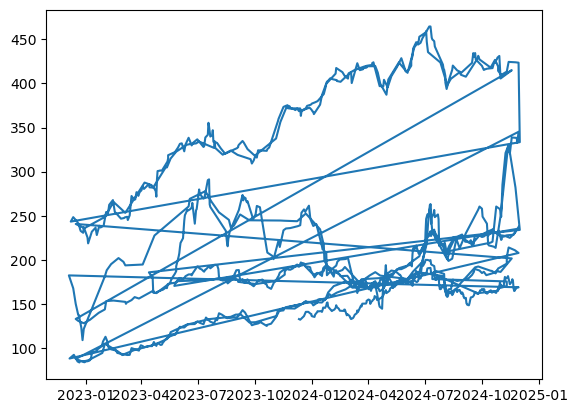

In [95]:
import matplotlib.pyplot as plt
plt.plot(merged_df['Date'],merged_df['Close'])
plt.show()

In [96]:
merged_df.to_csv("Merged_data.csv")

## Merged Data

In [97]:
merged_df.head(50)

,Stock,sentiment_score,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,sentiment_score_average
0,AAPL,0.104167,2024-11-29,234.809998,237.809998,233.970001,237.330002,28481400.0,0.0000,0.0,0.122917
1,AAPL,0.141667,2024-11-29,234.809998,237.809998,233.970001,237.330002,28481400.0,0.0000,0.0,0.122917
2,AAPL,0.104167,2024-11-22,228.059998,230.720001,228.059998,229.869995,38168300.0,0.0000,0.0,0.104167
3,AAPL,0.104167,2024-11-15,226.399994,226.919998,224.270004,225.000000,47923700.0,0.0000,0.0,0.104167
4,AAPL,0.104167,2024-11-08,227.169998,228.660004,226.410004,226.960007,38328800.0,0.2500,0.0,0.113826
5,AAPL,0.123485,2024-11-08,227.169998,228.660004,226.410004,226.960007,38328800.0,0.2500,0.0,0.113826
6,AAPL,0.000000,2024-11-02,225.559287,227.770589,224.814484,225.886261,45065775.0,0.1875,0.0,0.131754
7,AAPL,0.148889,2024-11-02,223.948576,226.881174,223.218965,224.812515,51802750.0,0.1250,0.0,0.131754
8,AAPL,0.246372,2024-11-02,222.337865,225.991759,221.623445,223.738770,58539725.0,0.0625,0.0,0.131754
9,AAPL,0.104167,2024-11-01,220.727153,225.102345,220.027926,222.665024,65276700.0,0.0000,0.0,0.104167


In [53]:
merged_df12.to_csv("Data_with_content.csv")